In [1]:
pip install pyLDAvis==3.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.9 MB/s eta 0:00:00


In [5]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

preprocessed_documents = [preprocess(doc) for doc in documents]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary([doc.split() for doc in preprocessed_documents])
# Convert the document into a bag-of-words format
corpus = [dictionary.doc2bow(doc.split()) for doc in preprocessed_documents]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.101*"x" + 0.009*"entry" + 0.005*"file" + 0.005*"comic"')
(1, '0.015*"game" + 0.011*"line" + 0.010*"team" + 0.010*"subject"')
(2, '0.012*"line" + 0.011*"subject" + 0.009*"organization" + 0.008*"window"')
(3, '0.014*"israel" + 0.012*"jew" + 0.010*"israeli" + 0.008*"arab"')
(4, '0.010*"key" + 0.008*"space" + 0.006*"system" + 0.005*"u"')
(5, '0.016*"armenian" + 0.007*"medical" + 0.006*"health" + 0.006*"disease"')
(6, '0.013*"god" + 0.009*"one" + 0.006*"subject" + 0.006*"would"')
(7, '0.062*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.009*"la" + 0.008*"pit" + 0.008*"pt"')
(8, '0.011*"people" + 0.009*"would" + 0.007*"one" + 0.006*"dont"')
(9, '0.013*"line" + 0.013*"subject" + 0.013*"organization" + 0.009*"writes"')


In [8]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [18]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Get the number of topics
num_topics = lda_model.num_topics

# Initialize a list to hold topic distributions for each document
topic_vectors = []

# For each document, create a vector of size num_topics
for doc in corpus:
    doc_vector = np.zeros(num_topics)
    for topic_num, topic_val in doc:
        if topic_num < num_topics:  # Ensure topic_num is within bounds
            doc_vector[topic_num] = topic_val
    topic_vectors.append(doc_vector)  # Append the vector after the loop

# Convert the list to a NumPy array
topic_vectors = np.array(topic_vectors)

# Calculate cosine similarity between the topic vectors
similarity_matrix = cosine_similarity(topic_vectors)

# Example: Print similarity between document 0 and others
print(similarity_matrix[0])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1.        0.        0.2981424 ... 0.        0.        0.       ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


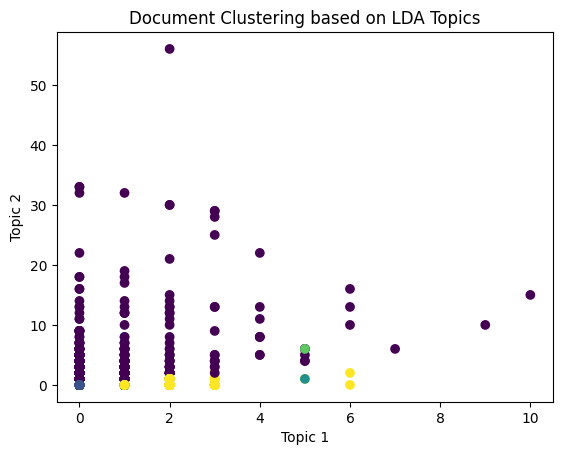

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(similarity_matrix)

# Visualize the clusters
plt.scatter(topic_vectors[:, 0], topic_vectors[:, 1], c=km.labels_, cmap='viridis')
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title('Document Clustering based on LDA Topics')
plt.show()